In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('pima-indians-diabetes.csv', delimiter=',')
dataframe.head()


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
# split into input (X) and output (y) variables
X = dataframe.iloc[:,:8]
y = dataframe.iloc[:,8]


In [4]:
dataframe.shape

(767, 9)

In [5]:
features_train,features_test,target_train,target_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [6]:
# define the keras model
network=models.Sequential()
network.add(Dense(units=8,activation="relu",input_shape=(features_train.shape[1],)))
network.add(Dense(units=8,activation="relu"))
#network.add(Dense(units=16,activation="relu"))
network.add(Dense(units=1,activation="sigmoid"))

C:\Windows\System32\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# compile the keras model
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# fit the keras model on the dataset
#network.fit(features_train,features_test, epochs=10, batch_size=100,verbose=2)
history=network.fit(features_train,target_train,epochs=20,verbose=1,batch_size=100,validation_data=(features_test,target_test))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.3704 - loss: 25.6841 - val_accuracy: 0.3898 - val_loss: 23.8571
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4133 - loss: 20.5916 - val_accuracy: 0.4213 - val_loss: 18.6160
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4405 - loss: 16.3984 - val_accuracy: 0.4882 - val_loss: 14.9827
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5029 - loss: 13.4109 - val_accuracy: 0.5276 - val_loss: 12.1768
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5361 - loss: 11.4683 - val_accuracy: 0.5394 - val_loss: 9.6868
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5828 - loss: 9.8994 - val_accuracy: 0.5827 - val_loss: 7.9817
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6082 - loss: 8.8163 - val_accuracy: 0.5945 - val_loss: 6.8539
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5945 - loss: 7.9172 - val_accuracy: 0.6181 - val_los

In [9]:
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]

In [10]:
epoch_count=range(1,len(training_loss)+1)

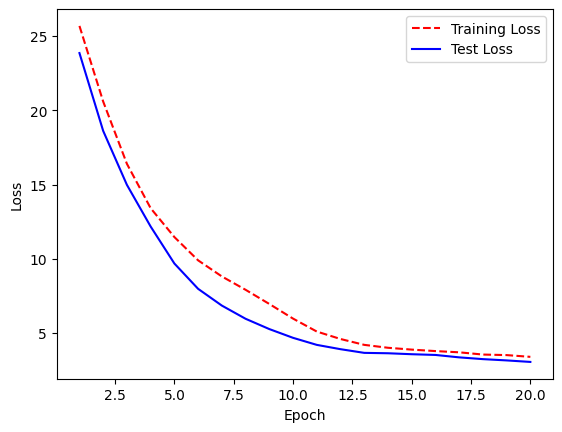

In [11]:
plt.plot(epoch_count,training_loss,"r--")
plt.plot(epoch_count,test_loss,"b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [12]:
_, accuracy = network.evaluate(features_train,target_train)
print('Accuracy: %.2f' % (accuracy*100))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5263 - loss: 3.3041 
Accuracy: 52.63


In [13]:
# preict using the keras model
predicted_target= network.predict(features_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 


In [14]:
_, accuracy = network.evaluate(features_test,target_test)
print('Accuracy: %.2f' % (accuracy*100))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5157 - loss: 3.0602
Accuracy: 51.57


In [15]:
#Y=target_train
for i in range(10):
    print(predicted_target[i])

[0.5408249]
[0.9924687]
[0.25860694]
[7.2621755e-05]
[0.9918176]
[0.2386642]
[0.50563073]
[0.00174141]
[0.00252938]
[4.5198736e-05]


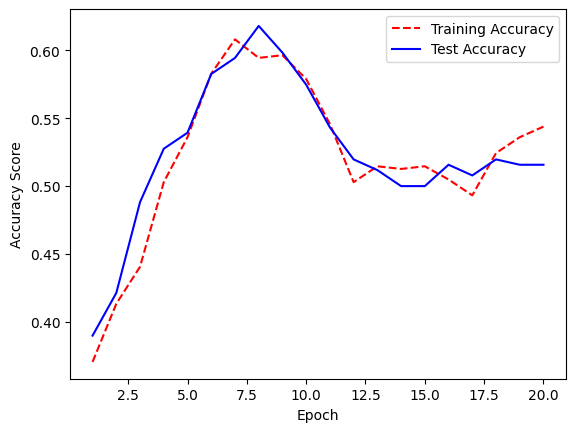

In [16]:
training_accuracy=history.history["accuracy"]
test_accuracy=history.history["val_accuracy"]
plt.plot(epoch_count,training_accuracy,"r--")
plt.plot(epoch_count,test_accuracy,"b-")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()
